In [1]:
#import libraries to use
import time
start_time = time.time()

import utils.slab as slab
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


### 1. CREATE A SLAB OBJECT

A slab object is built with the attributes contained in the `input.json` file and  `scaling_relationship.json` file, and other attributes are computed internally based on the input information.

In [2]:
#Specify input json file and scaling_relationship file paths
input_file='../config_files/Parameters/input.json'
scaling_file='../config_files/Parameters/scaling_relationship.json'

#Initialize an instance of the class Slab with the input files
Slab_obj=slab.Slab(input_file,scaling_file)

reading input.json file
reading scaling_relationship.json file
reading mesh


PLOT SLAB MESH AND THE COMPUTED SPDF


C:\Users\ascal\Downloads\ANTI-FASc\bin\utils\slab.py:389: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(scaled_tick_labels)


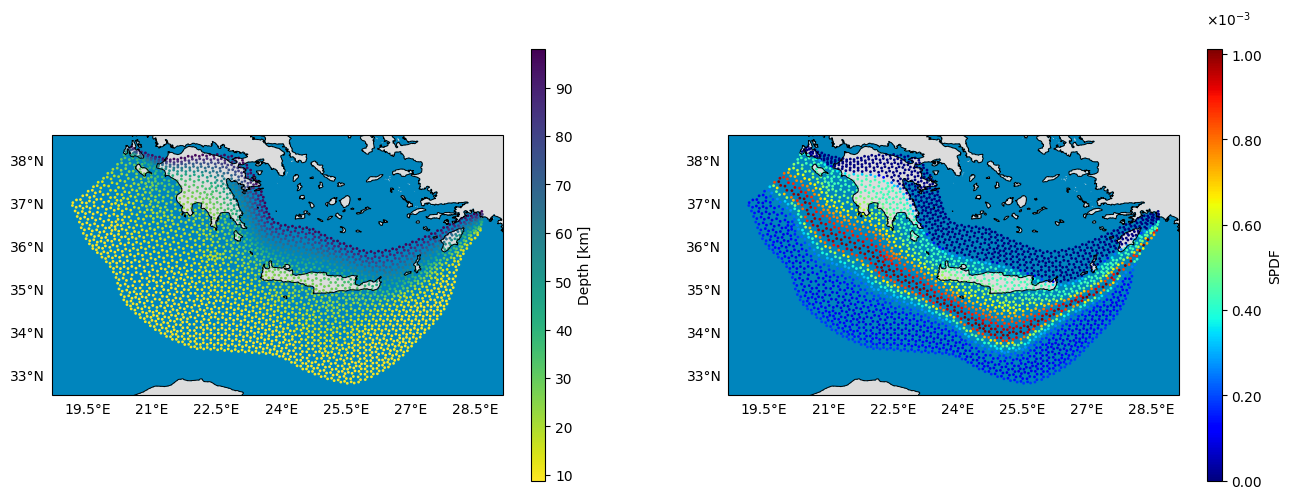

In [3]:
#plot slab and SPDF (Slip Probability Density Function)
print('PLOT SLAB MESH AND THE COMPUTED SPDF')
#PLOT SLAB MESH AND COMPUTED SPDF
fig,axs = plt.subplots(1,2,figsize=(16, 8),subplot_kw={'projection': ccrs.PlateCarree()})

# Create a GeoAxes in the tile's projection
ax=axs[0]
# Add coastlines and features
ax.coastlines(resolution='10m',linewidth=0.7)
ax.add_feature(cfeature.LAND, linestyle=':',color='gainsboro')
ax.add_feature(cfeature.OCEAN, linestyle=':',color='#0085BD')

# Add gridlines
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.top_labels = False
gl.right_labels = False

#plot Slab mesh
Slab_obj.plot_slab(ax,colorbar=True)


ax1=axs[1]
#ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m',linewidth=0.7)
ax1.add_feature(cfeature.LAND, linestyle=':',color='gainsboro')
ax1.add_feature(cfeature.OCEAN, linestyle=':',color='#0085BD')
Slab_obj.plot_SPDF(ax1,colorbar=True)
# Add gridlines
gl = ax1.gridlines(draw_labels=True, alpha=0)
gl.top_labels = False
gl.right_labels = False








### 2. SELECTION OF RUPTURE BARYCENTERS

The second step will generate a selection of rupture barycenters having a fixed `minimum_interdistance`
this distance is optimised to avoid to have too much similar rupture areas, in particular for large magnitude values. 
This selection is based on the magnitude binning and the selected scaling laws that are set in the file `scaling_relationships.json`.
For this, apply the method `active_barycenters()` to and subsequently the method `select_barycenter2()`.




In [4]:
#Select active barycenters for the whole subduction 
Slab_obj.active_barycenters()
#Selection of barycenters for case-study or hazard
Slab_obj.select_barycenter2()

Barycenter selection
Magnitude bin # 10 - Mw=8.3782
Magnitude bin # 11 - Mw=8.5007
Magnitude bin # 12 - Mw=8.6115
Barycenter selection (PTF)
Magnitude bin # 10 - Mw=8.3782
Magnitude bin # 11 - Mw=8.5007
Magnitude bin # 12 - Mw=8.6115


We can check the Mw and scaling relationships for which rupturing barycenters were selected

In [5]:
print(f'Mw: {Slab_obj.get_magnitudes()}')
print(f'Scaling names: {Slab_obj.Name_scaling}')

Mw: [8.3782 8.5007 8.6115]
Scaling names: ['Murotani', 'Strasser']


Now, let's choose from the lists above a combination of magnitude and scaling relationship and plot the respecive rupturing barycenters. 

PLOT BARYCENTERS FOR  Mw=8.8846 and SCALING NAME: Murotani
Magnitude 8.8846 not found.
Please choose one of the following magnitudes: [8.3782 8.5007 8.6115]


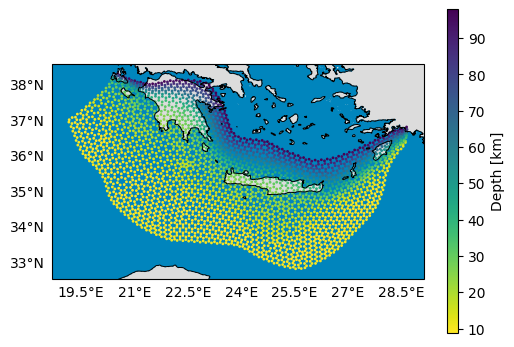

In [6]:
#plot barycenters for the specified combination of Mw and scaling relationship
Mw=8.8846
scaling='Murotani'

print(f'PLOT BARYCENTERS FOR  Mw={Mw} and SCALING NAME: {scaling}')

fig,ax = plt.subplots(1,1,figsize=(6, 6),subplot_kw={'projection': ccrs.PlateCarree()})

# Create a GeoAxes in the tile's projection

# Add coastlines and features
ax.coastlines(resolution='10m',linewidth=0.7)
ax.add_feature(cfeature.LAND, linestyle=':',color='gainsboro')
ax.add_feature(cfeature.OCEAN, linestyle=':',color='#0085BD')

# Add gridlines
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.top_labels = False
gl.right_labels = False

#plot Slab mesh
Slab_obj.plot_slab(ax,colorbar=True)

#PLOT BARYCENTERS
Slab_obj.plot_barycenters_mag(Mw,scaling,ax)


### 3. RUPTURE AREAS COMPUTE

First we need to compute or load the matrix distance and the connectivity matrix of the mesh, and compute the mesh' elements areas

In [7]:

Slab_obj.compute_area()
Slab_obj.Element2Element()
Slab_obj.compute_matrix_distance()


Compute the rupturing areas for every barycenter in each combination of magnitude and scaling relationship by applying the method `rupture_areas()`

In [8]:
Slab_obj.rupture_areas()

Rupture area computation
Magnitude bin # 10 - Mw=8.3782
Magnitude bin # 11 - Mw=8.5007
Magnitude bin # 12 - Mw=8.6115


Likewise, we can check the number of rupture areas computed for each combination of magnitude and scaling relationship name

In [9]:
Slab_obj.get_RuptAreas_number()

Mw=8.3782, Name scaling: Murotani, N=66
Mw=8.3782, Name scaling: Strasser, N=73
Mw=8.5007, Name scaling: Murotani, N=52
Mw=8.5007, Name scaling: Strasser, N=60
Mw=8.6115, Name scaling: Murotani, N=45
Mw=8.6115, Name scaling: Strasser, N=49


Now, let's plot an example of a computed rupturing area for the scenario $M_w$=8.8846 and scaling relationship: *Murotani*

PLOT BARYCENTERS FOR  Mw=8.8846 and SCALING NAME: Murotani
Magnitude 8.8846 not found.
Please choose one of the following magnitudes: [8.3782 8.5007 8.6115]


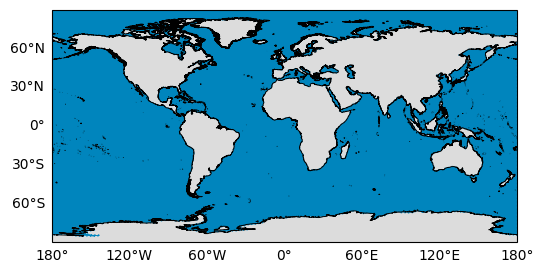

In [10]:
#plot barycenters for the specified combination of Mw and scaling name
Mw=8.8846
scaling='Murotani'
Rupture_area_id=5

print(f'PLOT BARYCENTERS FOR  Mw={Mw} and SCALING NAME: {scaling}')

fig,ax = plt.subplots(1,1,figsize=(6, 6),subplot_kw={'projection': ccrs.PlateCarree()})

# Create a GeoAxes in the tile's projection

# Add coastlines and features
ax.coastlines(resolution='10m',linewidth=0.7)
ax.add_feature(cfeature.LAND, linestyle=':',color='gainsboro')
ax.add_feature(cfeature.OCEAN, linestyle=':',color='#0085BD')

# Add gridlines
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.top_labels = False
gl.right_labels = False

Slab_obj.plot_rupture_area(Mw,scaling,Rupture_area_id,ax,True)

Finally, write the output files

In [11]:
#Write Output
Slab_obj.write_output_rupture_areas()
#generate folder tree for outputs
Slab_obj.generate_foldertree_slip()

FileExistsError: [WinError 183] Impossibile creare un file, se il file esiste già: '../Hellenic_Creta_85_bound_M85_E2210_N3702'

### SLIP DISTRIBUTION COMPUTATION ###

In [ ]:
#compute slipe distributions
Slab_obj.slip_distribution()

In [13]:
end_time = time.time()
print( end_time - start_time)

2090.5353288650513
